In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
data=pd.read_csv('Advertising Budget and Sales.csv')
data.shape

(200, 5)

In [5]:
data.head()

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [7]:
columns=['ID','TV_AD_Budget','Radio_AD_Budget','Newspaper_AD_Budget','Sales']
data.columns=columns
columns

['ID', 'TV_AD_Budget', 'Radio_AD_Budget', 'Newspaper_AD_Budget', 'Sales']

In [8]:
data.drop(['ID'],axis=1,inplace=True)
data.head()

,TV_AD_Budget,Radio_AD_Budget,Newspaper_AD_Budget,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


#### Lets check for missing values in the data

In [10]:
data.isnull().sum()

TV_AD_Budget           0
Radio_AD_Budget        0
Newspaper_AD_Budget    0
Sales                  0
dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TV_AD_Budget         200 non-null    float64
 1   Radio_AD_Budget      200 non-null    float64
 2   Newspaper_AD_Budget  200 non-null    float64
 3   Sales                200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [12]:
data.describe()

,TV_AD_Budget,Radio_AD_Budget,Newspaper_AD_Budget,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


#### lets visualize the data to see how it is distributed

Text(0, 0.5, 'Sales')

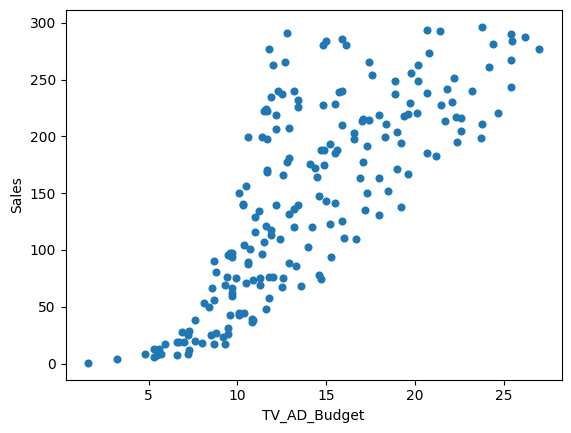

In [40]:



y1=data['TV_AD_Budget']
y2=data['Radio_AD_Budget']
y3=data['Newspaper_AD_Budget']
x=data['Sales']

plt.scatter(x, y1 ,s=23)
plt.xlabel('TV_AD_Budget')
plt.ylabel('Sales')




Text(0, 0.5, 'Sales')

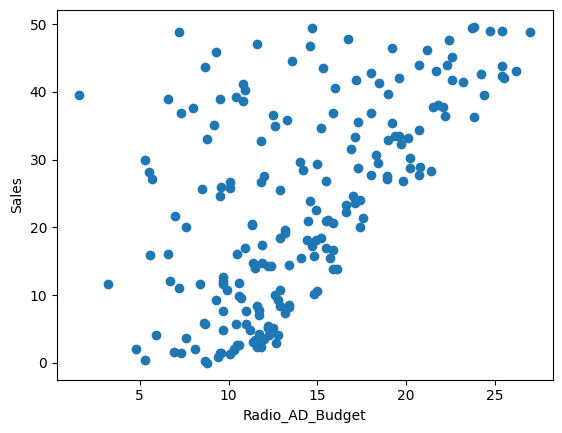

In [42]:

plt.scatter(x, y2)
plt.xlabel('Radio_AD_Budget')
plt.ylabel('Sales')




Text(0, 0.5, 'Sales')

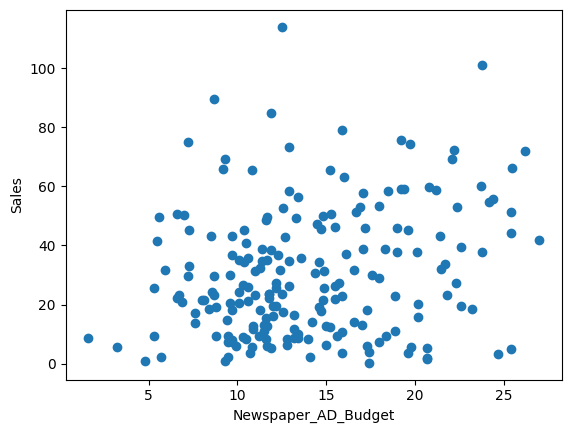

In [43]:

plt.scatter(x, y3)
plt.xlabel('Newspaper_AD_Budget')
plt.ylabel('Sales')



In [45]:
x=data.drop(['Sales'],axis=1)
y=data['Sales']


In [53]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state = 0)

In [54]:
x_train.shape

(140, 3)

In [55]:
x_test.shape

(60, 3)

In [56]:
# fit the linear regression model

# import the LinearRegression class from linear_model library
from sklearn.linear_model import LinearRegression

# instantiate an object lr
lr = LinearRegression()


# Train the model using the training sets
lr.fit(x_train, y_train)

LinearRegression()

In [57]:
# Predict on the test data set
y_pred = lr.predict(X_test)

In [58]:
# Calculate and print Root Mean Square Error(RMSE)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE value: {:.4f}".format(rmse))

RMSE value: 1.9213


In [59]:
# Calculate and print r2_score

from sklearn.metrics import r2_score
print ("R2 Score value: {:.4f}".format(r2_score(y_test, y_pred)))

R2 Score value: 0.8649


In [66]:
# Checking for Overfitting or Underfitting the data

print("Training set score: {:.4f}".format(lr.score(x_train,y_train)))

print("Test set score: {:.4f}".format(lr.score(x_test,y_test)))

Training set score: 0.9066
Test set score: 0.8649
